In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df[["Name", "Sex", "Age"]].head(10)

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
5,"Moran, Mr. James",male,NaN
6,"McCarthy, Mr. Timothy J",male,54.0
7,"Palsson, Master. Gosta Leonard",male,2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


# Pandas for Time Series

In [15]:
ibm = pd.read_csv("ibm.csv")
ibm.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


In [19]:
ibm_date = ibm.set_index("Date")
ibm_date.head(5)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


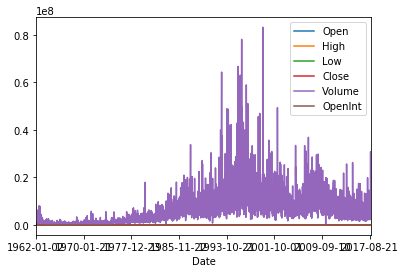

In [25]:
from matplotlib import pyplot as plt
ibm_plot = ibm_date.plot()

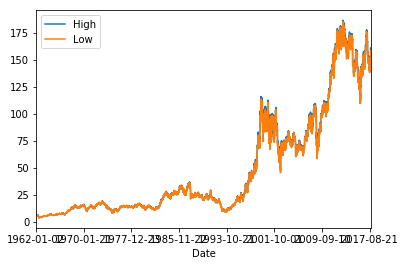

In [29]:
ibm_date[["High", "Low"]].plot()

In [30]:
ibm_date.index

Index(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05', '1962-01-08',
       '1962-01-09', '1962-01-10', '1962-01-11', '1962-01-12', '1962-01-15',
       ...
       '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02', '2017-11-03',
       '2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09', '2017-11-10'],
      dtype='object', name='Date', length=14059)

In [42]:
ibm_date.loc['2017-10-31']

Open           152.80
High           153.40
Low            151.42
Close          152.54
Volume     4370601.00
OpenInt          0.00
Name: 2017-10-31, dtype: float64

In [43]:
ibm_date.loc[['2017-10-31', '2017-11-08']]

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2017-10-31,152.8,153.40,151.42,152.54,4370601,0
2017-11-08,150.1,150.28,148.79,150.07,4679520,0


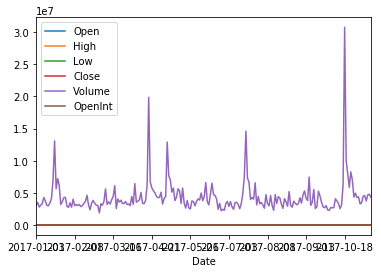

In [44]:
ibm_date.loc['2017-01-01': '2017-12-31'].plot()

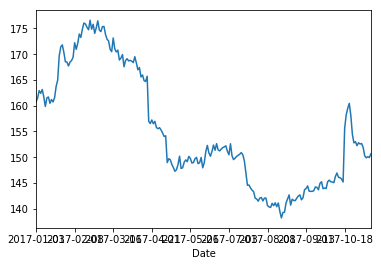

In [45]:
ibm_date.loc['2017-01-01': '2017-12-31', 'Open'].plot()

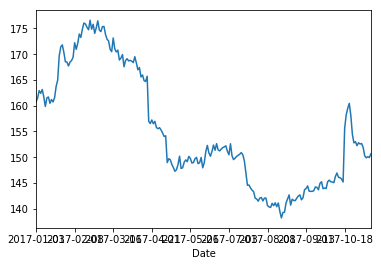

In [46]:
ibm_date['Open'].loc['2017-01-01': '2017-12-31'].plot()

In [49]:
ibm_date["Tomorrow"] = ibm_date["Close"].shift(-1)
ibm_date.tail(10)

,Open,High,Low,Close,Volume,OpenInt,Tomorrow
Date,,,,,,,
2017-10-30,152.24,153.06,151.20,152.83,4252385,0,152.54
2017-10-31,152.80,153.40,151.42,152.54,4370601,0,152.51
2017-11-01,152.57,153.37,152.31,152.51,3270654,0,151.83
2017-11-02,152.65,152.96,151.40,151.83,3431080,0,150.08
2017-11-03,151.90,151.95,149.99,150.08,4475615,0,149.35
2017-11-06,150.27,150.32,148.79,149.35,4543499,0,149.85
2017-11-07,149.87,150.01,149.01,149.85,3729501,0,150.07
2017-11-08,150.10,150.28,148.79,150.07,4679520,0,150.30
2017-11-09,149.93,151.80,149.86,150.30,4776388,0,149.16


In [54]:
ibm_date["PriceDiff"] = ibm_date["Tomorrow"] - ibm_date["Close"]
ibm_date.head()

,Open,High,Low,Close,Volume,OpenInt,Tomorrow,PriceDiff
Date,,,,,,,,
1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0,6.3963,0.0585
1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0,6.3295,-0.0668
1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0,6.2041,-0.1254
1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0,6.0870,-0.1171
1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0,6.1621,0.0751


In [55]:
ibm_date["DailyReturn"] = ibm_date["PriceDiff"] / ibm_date["Close"]
ibm_date.head()

,Open,High,Low,Close,Volume,OpenInt,Tomorrow,PriceDiff,DailyReturn
Date,,,,,,,,,
1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0,6.3963,0.0585,0.009230
1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0,6.3295,-0.0668,-0.010444
1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0,6.2041,-0.1254,-0.019812
1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0,6.0870,-0.1171,-0.018875
1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0,6.1621,0.0751,0.012338


In [60]:
ibm_date["Direction"] = [1 if ibm_date.loc[date, "DailyReturn"] > 0 else -1 for date in ibm_date.index]

In [61]:
ibm_date.head()

,Open,High,Low,Close,Volume,OpenInt,Tomorrow,PriceDiff,DailyReturn,Direction
Date,,,,,,,,,,
1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0,6.3963,0.0585,0.009230,1
1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0,6.3295,-0.0668,-0.010444,-1
1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0,6.2041,-0.1254,-0.019812,-1
1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0,6.0870,-0.1171,-0.018875,-1
1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0,6.1621,0.0751,0.012338,1


In [62]:
softnessMean = 10
ibm_date["MovAvg"] = ibm_date['Close'].rolling(softnessMean).mean()

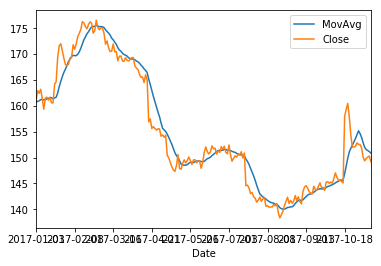

In [63]:
ibm_date[["MovAvg", 'Close']].loc["2017-01-01": "2017-12-31"].plot()